In [93]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from scipy import stats
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from sklearn import metrics
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import string


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV


In [95]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [96]:
import nltk
#nltk.download('stopwords')
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

In [97]:
df= pd.read_excel(r'E:\banque misr\Final_Data.xlsx')

In [98]:
df=pd.DataFrame(df)

In [99]:
print(df.shape)
df=df.dropna()
df=df.drop_duplicates()
print(df.shape)

(40046, 3)
(40017, 3)


In [100]:
df.head(20)

,review_description,rating,company
0,رائع,positive,talbat
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat
3,لماذا لا يمكننا طلب من ماكدونالدز؟,negative,talbat
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat
5,أصبح غالي جداً,negative,talbat
6,جميل جدا رائع. . .,positive,talbat
7,للأسف الواحد ينصدم بعد زيادة الاسعار و للاسف ب...,negative,talbat
8,برنامج توترز توصيل احلى من برنامجكم فاشل,negative,talbat
9,كتير في تحسن خدمة العملاء لطفين في بعض الاخطاء...,positive,talbat


<AxesSubplot:>

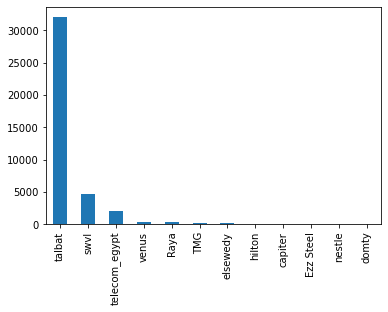

In [101]:
df.company.value_counts().plot(kind='bar')

In [102]:
fig = px.sunburst(df, path=['company', 'rating'],title= 'Relation between company and rating')
fig.update_traces(textinfo='label + percent parent')

In [103]:
df.review_description[17]

'نزلته ومفيش الخصم اللي قلته عليه علي أول 3طلبات اعمل ايه عشان يطبق'

In [104]:
def del_digits_and_pun(value,pun):
    new_value= re.sub('[1-9]','',value)
    for i in pun:
        new_value=new_value.replace(i,' ')
    return new_value

In [105]:
arabic_punctuations = """
`÷×؛،.<>_()*&^%][ـ،/:؟.,'{}~¦+|!”…“–#.ـ
"""

english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
punctuations_list
list_pun=[i for i in punctuations_list]
df.review_description=df.review_description.apply(del_digits_and_pun,args=[list_pun])
df.review_description[17]


'نزلته ومفيش الخصم اللي قلته عليه علي أول طلبات اعمل ايه عشان يطبق'

In [106]:
def tokens_review(x,stop_words):
    x=str(x)
    words=word_tokenize(x)
    new_words=[]
    for i in words:
        text = re.sub(r'[^ء-ي  0-9]',' ',i)
        
        if text not in stop_words:
            new_words.append(text)
    return new_words
            
            

In [107]:
#clean data from stop_words , arabic punctuations and english punctuations
import string
stop_words=stopwords.words('arabic')
stop_words.remove('لا')
stop_words.remove('لكن')
stop_words.remove('ولكن')
stop_words.remove('واو')
stop_words.remove('أطعم')
stop_words.remove('أف')
stop_words.append('طلبات')
stop_words.append('شركه')
stop_words.append('برنامج')
stop_words.append('تطبيق')

df['review_words_list']=df.review_description.apply(tokens_review,args=[stop_words])
stop_words


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل',
 'على

In [108]:
df[20:60]

,review_description,rating,company,review_words_list
20,التطبيق صار سيء كثير وتاخير في توصيل الطلبات ...,negative,talbat,"[التطبيق, سيء, كثير, وتاخير, توصيل, الطلبات, ا..."
21,موت,positive,talbat,[موت]
22,راااائع,positive,talbat,[راااائع]
23,اسوء تطبيق اول مابعرف ما اعمل تاني في جميع الا...,negative,talbat,"[اسوء, اول, مابعرف, اعمل, تاني, الاعلانات, سيء..."
24,حلو بس ما قدرت اعممل حساب,positive,talbat,"[حلو, قدرت, اعممل, حساب]"
25,مت عجبني لانه بن نادر أشوف شي محل في دفع نقد,negative,talbat,"[مت, عجبني, لانه, بن, نادر, أشوف, شي, محل, دفع..."
26,الحمدلله تم التواصل مع المسؤولين عن طلبات ورجع...,positive,talbat,"[الحمدلله, تم, التواصل, المسؤولين, ورجعولي, فح..."
27,شيء بخزي قعدت ساعه أستنى طلب واخر شيء كتبولي ط...,negative,talbat,"[شيء, بخزي, قعدت, ساعه, أستنى, طلب, واخر, شيء,..."
28,٨٠٪ من بغداد لا يمكن التوصيل اليه ادري شكو مسو...,negative,talbat,"[ , بغداد, لا, يمكن, التوصيل, اليه, ادري, شك..."
29,معظم المطاعم يتعذر التوصيل لها,negative,talbat,"[معظم, المطاعم, يتعذر, التوصيل]"


In [109]:
from nltk.stem import ARLSTem
from nltk.stem.isri import ISRIStemmer

In [110]:
def stem(x):
    st=ARLSTem()
    new =""
    for i in x:
        new+=" "+ st.stem(i) 
    return new
        

In [111]:
df['stem_review']=df.review_words_list.apply(stem)

In [112]:
df.head(20)

,review_description,rating,company,review_words_list,stem_review
0,رائع,positive,talbat,[رائع],رائع
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat,"[رائع, جدا, يساعد, تلبيه, الاحتياجات, بشكل, اسرع]",رائع جدا ساعد لبي احتياج بشكل سرع
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...",تطبيق لا غتح دائم بيعطيني لا وجد تصل شبك انه ...
3,لماذا لا يمكننا طلب من ماكدونالدز,negative,talbat,"[لماذا, لا, يمكننا, طلب, ماكدونالدز]",لماذ لا يمك طلب ماكدونالدز
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat,"[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,...",برنامج بيظهر مطاعم مغلق انه بتك فاتح بقال كده...
5,أصبح غالي جداً,negative,talbat,"[غالي, جدا ]",غالي جدا
6,جميل جدا رائع,positive,talbat,"[جميل, جدا, رائع]",جميل جدا رائع
7,للأسف الواحد ينصدم بعد زيادة الاسعار و للاسف ب...,negative,talbat,"[للأسف, الواحد, ينصدم, زيادة, الاسعار, للاسف, ...",اسف واحد نصدم زياد سعر اسف مطاعم اصبح معامل رديئ
8,برنامج توترز توصيل احلى من برنامجكم فاشل,negative,talbat,"[توترز, توصيل, احلى, برنامجكم, فاشل]",وترز وصيل حلي برنامج فاشل
9,كتير في تحسن خدمة العملاء لطفين في بعض الاخطاء...,positive,talbat,"[كتير, تحسن, خدمة, العملاء, لطفين, الاخطاء, ال...",كتير تحس خدم عملاء لطف خطء تقني لكن بتصلحو بس...


In [113]:
df1=df[df.stem_review !=""]
df1=df1[df1.rating!= "neutral"]


In [114]:
df1.head(20)

,review_description,rating,company,review_words_list,stem_review
0,رائع,positive,talbat,[رائع],رائع
1,برنامج رائع جدا يساعد على تلبيه الاحتياجات بشك...,positive,talbat,"[رائع, جدا, يساعد, تلبيه, الاحتياجات, بشكل, اسرع]",رائع جدا ساعد لبي احتياج بشكل سرع
2,التطبيق لا يغتح دائما بيعطيني لا يوجد اتصال با...,negative,talbat,"[التطبيق, لا, يغتح, دائما, بيعطيني, لا, يوجد, ...",تطبيق لا غتح دائم بيعطيني لا وجد تصل شبك انه ...
3,لماذا لا يمكننا طلب من ماكدونالدز,negative,talbat,"[لماذا, لا, يمكننا, طلب, ماكدونالدز]",لماذ لا يمك طلب ماكدونالدز
4,البرنامج بيظهر كل المطاعم و مغلقه مع انها بتكو...,negative,talbat,"[البرنامج, بيظهر, المطاعم, مغلقه, انها, بتكون,...",برنامج بيظهر مطاعم مغلق انه بتك فاتح بقال كده...
5,أصبح غالي جداً,negative,talbat,"[غالي, جدا ]",غالي جدا
6,جميل جدا رائع,positive,talbat,"[جميل, جدا, رائع]",جميل جدا رائع
7,للأسف الواحد ينصدم بعد زيادة الاسعار و للاسف ب...,negative,talbat,"[للأسف, الواحد, ينصدم, زيادة, الاسعار, للاسف, ...",اسف واحد نصدم زياد سعر اسف مطاعم اصبح معامل رديئ
8,برنامج توترز توصيل احلى من برنامجكم فاشل,negative,talbat,"[توترز, توصيل, احلى, برنامجكم, فاشل]",وترز وصيل حلي برنامج فاشل
9,كتير في تحسن خدمة العملاء لطفين في بعض الاخطاء...,positive,talbat,"[كتير, تحسن, خدمة, العملاء, لطفين, الاخطاء, ال...",كتير تحس خدم عملاء لطف خطء تقني لكن بتصلحو بس...


In [115]:
X=df1.stem_review
y=df1.rating

In [116]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)


In [117]:
X=[i for i in X]

In [118]:
X=cv.fit_transform(X)

In [119]:
X=X.toarray()

In [120]:
X.shape

(37990, 2000)

In [121]:
def encoding(x,values):
    for i in values :
        if i==x:
            return values.index(i)
        
            
  

In [122]:
y=y.apply(encoding, args=[y.unique().tolist()])
y.shape
X.shape

(37990, 2000)

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X,y,random_state=42,test_size=0.20,shuffle=True)

In [124]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

C:\Users\Zahran\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Testing accuracy   : 85.3908923400895 %
MSE [TEST]          : 0.14609107659910503
Training accuracy  : 89.14516978152145 %
MSE [TRAIN]         : 0.10854830218478546
precision :  0.853908923400895
recall    :  0.853908923400895
f1_score  :  0.853908923400895


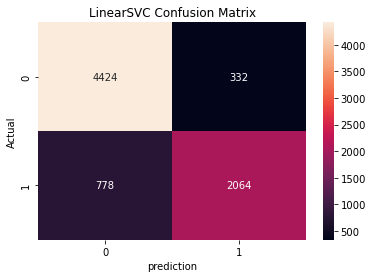

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     19058
           1       0.91      0.78      0.84     11334

    accuracy                           0.89     30392
   macro avg       0.90      0.87      0.88     30392
weighted avg       0.89      0.89      0.89     30392

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4756
           1       0.86      0.73      0.79      2842

    accuracy                           0.85      7598
   macro avg       0.86      0.83      0.84      7598
weighted avg       0.85      0.85      0.85      7598



In [125]:
from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)